# **Introduction**

In this set of activities, we will introduce you to some basic data manipulation skills, including reading data from external files.

You will use these skills to solve a series of problems that lead you towards the task for this module: calculating the mean stack of a set of FITS images.
If you already have lots of programming experience, these will be straightforward, and we expect you to work through them quickly.

If you're new to programming we've broken the problem down into stages so you can work on manageable chunks.

# **Introduction to NumPy arrays**

Let's start with a program to calculate the mean of a set of numbers stored in a Python list.

The mean function in the Python statistics module works like this:

In [ ]:
from statistics import mean
fluxes = [23.3, 42.1, 2.0, -3.2, 55.6]
m = mean(fluxes)
print(m)

23.96


or we could calculate the mean manually:

In [ ]:
fluxes = [23.3, 42.1, 2.0, -3.2, 55.6]
m = sum(fluxes)/len(fluxes)
print(m)

23.96


using the built-in sum and len functions.

Use the standard library function (e.g. mean) if it exists rather than implementing your own, unless there is a good reason not to.

One good reason (at least temporarily) is learning!

# **Question: Mean of a list**

We'll start with an easy question to check everything is working.

Write a function calculate_mean that calculates the mean of a list of numbers. Your function should take a single argument, the list of floats, and return the mean of that list.

Your solution cannot use the builtin statistics module.

Make sure your program works for negative numbers as well. We will not test your program with an empty list.

# ⏰ **Remember the testing trick!**
In Grok, you must only submit your function definition. Your program must not print any output. To test your function, use the __name__ == '__main__' trick, like this:

In [ ]:
def double(a):
  return a*2

if __name__ == '__main__':
  # run your tests in here
  print(double(5))

10


Everything in this if statement will be ignored by the marker.

# ⌛Solution:

In [ ]:
# Write your calculate_mean function here.
def calculate_mean(numbers):
    if not numbers:  # Check if the list is empty
        return 0
    return sum(numbers) / len(numbers)

# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your `calculate_mean` function with examples:
  mean = calculate_mean([1,2.2,0.3,3.4,7.9])
  print(mean)

2.96


# **Reading strings from CSV files**

Tables are often stored in comma-separated values (CSV) format. You can use Python's built-in string functions to read a CSV file into a list and process it.

The following examples read this data.csv file:

data.csv


In [ ]:
data = []
for line in open('data.csv'):
  data.append(line.strip().split(','))
print(data)

The strip method removes whitespace (including the newline) from the ends of line. The split method creates a list of strings using the ',' character as the separator between items.

# ⏰ **Each value is a string!**

The split method returns a list of strings, so each value in each row is a string. We have to convert the values to floats before we can do any calculations with them.

# **Reading numbers from CSV files**
Now we can store the data in lists, we need to convert each item from a string to a float. We could do this using nested for loops:

In [ ]:
data = []
for line in open('data.csv'):
  row = []
  for col in line.strip().split(','):
    row.append(float(col))
  data.append(row)

print(data)

NumPy has a simpler asarray function to do this conversion:

In [ ]:
import numpy as np

data = []
for line in open('data.csv'):
  data.append(line.strip().split(','))

data = np.asarray(data, float)
print(data)

Most NumPy functions operate on the whole array at once rather than individual items.

# **Reading a NumPy array from CSV**

In [ ]:
import numpy as np
data = np.loadtxt('data.csv', delimiter=',')
print(data)

The NumPy loadtxt function is simpler, faster, and less error-prone than our previous solution. Use it!

# **Question: Mean of a 1D Array**

Write a calc_stats function that reads data from a CSV file and calculates its mean and the median. Your function should take the name of the file as an argument and return the mean and median in a tuple, rounded to one decimal place.

The first value is the mean and the second value is the median. You can round your results using NumPy's round function.

Your solution cannot use the builtin statistics module.

To test your program with different files we've provided another two CSV files in the editor on the right.

Don't forget to round your results to one decimal place!

# **Hint**
If you are using numpy's loadtxt function, make sure you set the delimiter to comma.

# ⌛Solution:

In [ ]:
# Write your calc_stats function here.
import numpy as np
def calc_stats(filename):
  data = np.loadtxt(filename, delimiter = ',')
  mean = np.round(np.mean(data),1)
  median = np.round(np.median(data),1)
  return mean, median

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your `calc_stats` function with examples:
  mean = calc_stats('data3.csv')
  print(mean)

FileNotFoundError: data3.csv not found.

# **NumPy arrays: Element-Wise operations**
Unlike Python lists, NumPy arrays support numerical operations on entire arrays, either as element-wise or matrix operations.

A few examples are shown below:

In [ ]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Element-wise multiplication
print(a*2)

# Element-wise summation
print(a + b)

# Element-wise product
print(a*b)

[2 4 6]
[5 7 9]
[ 4 10 18]


NumPy provides many functions for element-wise calculations.

# **NumPy array operations**

We can access elements in an array with index notation, just like a list. Functions that work on lists also work on 1D NumPy arrays.

You may have noticed that we also construct 1D arrays using lists.

We can construct a multi-dimensional array from a nested list i.e. lists within a list. We saw nested lists when reading from CSV files.

Rows or columns can be accessed using slicing, as shown below:

In [ ]:
import numpy as np

a = np.array([[1,2,3], [4,5,6]])  # 2x3 array

# Print first row of a:
print(a[0,:])

# Print second column of a:
print(a[:,1])

[1 2 3]
[2 5]


# **Question: Mean of a set of signals**
Write a mean_datasets function that reads in a list of CSV files and returns an array of the mean of each cell in the data files.

The files each contain n rows and m columns, giving a total of n x m cells. The individual cells are separated by commas, and all CSV files in the list will have the same number of rows and columns.

The result should have the same dimensions as the input files. The result should be a NumPy array with individual entries rounded to one decimal place.

For this question, we will use the three files data1.csv, data2.csv and data3.csv.

# **Hint**:
We will test your function with different numbers of csv-files (but never less than two), so make sure it works in the general case. You can achieve this by looping over the list of file names and reading one file in at a time.

# ⌛Solution:

In [ ]:
# Write your mean_datasets function here
import numpy as np
def mean_datasets(filenames):
  n = len(filenames)
  if n > 0:
     data = np.loadtxt(filenames[0], delimiter = ',')
     for i in range (1,n):
      data+=np.loadtxt(filenames[i], delimiter = ',')
     data_mean = data/n
     return np.round(data_mean,1)

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with the first example from the question:
  print(mean_datasets(['data1.csv', 'data2.csv', 'data3.csv']))

  # Run your function with the second example from the question:
  print(mean_datasets(['data4.csv', 'data5.csv', 'data6.csv']))


# **Working with FITS files**

One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.

FITS files also have headers which store metadata about the image.

FITS files are a standard format and astronomers have developed many libraries (in many programming languages) that can read and write FITS files. We're going to use the [Astropy](https://www.google.com/search?client=safari&rls=en&q=astropy&ie=UTF-8&oe=UTF-8) module.

The following code shows how we can open a FITS file and print out its header information:

In [ ]:
from astropy.io import fits
hdulist = fits.open('image0.fits')
hdulist.info()

# **Reading in FITS file**
Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. Each HDU stores headers and (optionally) image data.

The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.

If we want to access individual HDUs, we can index the HDU list object returned by fits.open. The image data can be accessed using the data attribute:

In [ ]:
from astropy.io import fits

hdulist = fits.open('image0.fits')
data = hdulist[0].data

print(data.shape)

The image data is conveniently stored in a NumPy array, so we can operate on it directly. This example prints the dimensions of the image in the primary HDU.

# **New Section**

You often want to visualise the image data stored in FITS files. We can do this using the plotting library matplotlib.

This example creates a 2D plot from the previous FITS image:

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open('image0.fits')
data = hdulist[0].data

# Plot the 2D array
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

The code above produces the following image:

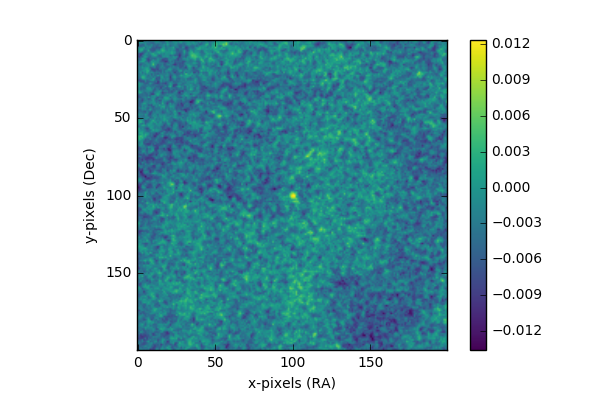

# **Question: Read a FITS file**
Write a load_fits function that loads in a FITS file and finds the position of the brightest pixel (i.e. the maximum value) in its image data. To make this function work for arbitrary files, pass the name of the FITS file as an argument to the function.

Using the file image0.fits from the previous examples, your program should work like this:

In [ ]:
load_fits('image1.fits')
(100, 100)

The brightest pixel in this image is exactly in the centre of the array, as you can check visually by plotting it: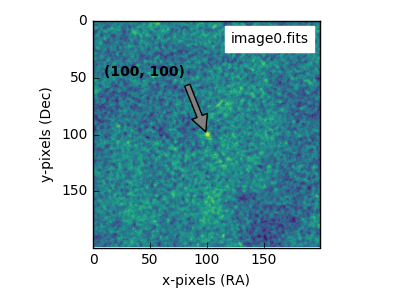

For the file image1.fits, the maximum is shifted by 1 pixel to the left and your function should produce the following output:

In [ ]:
load_fits('image1.fits')
(101, 100)

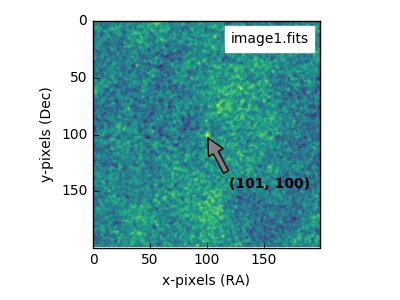

The FITS files for this example all contain image data of the same pulsar but that does not necessarily mean that it is visible in all of these images. When you take a look at the file image2.fits for instance, your function should be able to tell you that the brightest pixel is somewhere completely different:

In [ ]:
load_fits('image2.fits')
(14, 125)

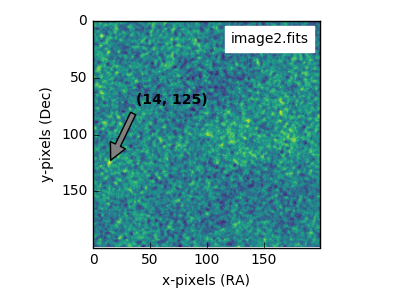

If you want to plot the arrays out for yourself, keep in mind that any additional code in your script needs to go into a if __name__ == '__main__' statement to be safely ignored by the automarker.

# **Hint**
If you are unsure how to do this problem, take a look at NumPy's argmax function. A short way of solving this problem is to make this function work on a 2D array.

# ⌛Solution:

In [ ]:
# Write your load_fits function here.
from astropy.io import fits
import numpy as np

def load_fits(fits_filename):
  with fits.open(fits_filename) as hdulist:
    data = hdulist[0].data
    max_pos=np.unravel_index(np.argmax(data), data.shape)
    return max_pos

if __name__ == '__main__':
  # Run your `load_fits` function with examples:
  bright = load_fits('image1.fits')
  print(bright)

  # You can also confirm your result visually:
  from astropy.io import fits
  import matplotlib.pyplot as plt

  hdulist = fits.open('image1.fits')
  data = hdulist[0].data

  # Plot the 2D image data
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

# **Putting it all together**

In this set of activities we've covered basic file reading and data manipulation techniques. You have learned how to load data and store it in either Python lists or NumPy arrays, and how to perform basic operations on both types of data.

The examples contained calculations of the mean of one- and two-dimensional datasets in a variety of ways.

We moved on to FITS files and how to load FITS files, visualise the image data, and extract specific information from the image.

Now we will put everything together and round up this module by calculating the mean of a stack of FITS files. Each individual file may or may not have a detected pulsar, but in the final stack you should be able to see a clear detection.*italicized text*

# **Question: Mean of a set of FITS files**

Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.

Your function should be able to process an arbitrary number of files. If you're unsure how to do that, take a look at the sample solutions to the previous problems.

The mean stack of these files will be a large 200 x 200 array, so we will only look at the central value of your returned array, which is where we expect the pulsar to be.

In [ ]:
# Write your mean_fits function here:
from astropy.io import fits
import numpy as np

def mean_fits(filenames):
  n = len(filenames)
  if n > 0:
    hdulist = fits.open(filenames[0])
    data = hdulist[0].data
    hdulist.close()

    sum_data = np.zeros_like(data)
    for filename in filenames:
      hdulist = fits.open(filename)
      sum_data += hdulist[0].data
      hdulist.close()
    mean_data = sum_data/n
    return mean_data

if __name__ == '__main__':

  # Test your function with examples from the question
  data  = mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()